<a href="https://colab.research.google.com/github/SiddhiMirgule/Blockchain1/blob/main/MAjorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCOS PREDICTOR

In [33]:
import numpy as np
import pandas as pd
import os

Importing Libraries

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import joblib
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import StratifiedKFold
from collections import Counter
import xgboost as xgb
from sklearn.model_selection import KFold

LOADING DATA

In [35]:
from google.colab import files
uploaded = files.upload()


Saving PCOS_data_without_infertility.xlsx to PCOS_data_without_infertility (4).xlsx


In [36]:
upload = files.upload()

Saving PCOS_infertility.csv to PCOS_infertility (4).csv


In [37]:
PCOS_inf = pd.read_csv('PCOS_infertility.csv')
PCOS_woinf = pd.read_excel('PCOS_data_without_infertility.xlsx',sheet_name='Full_new')
PCOS_woinf


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.500000,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.300000,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.200000,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


DATA PREPROCESSING

In [38]:

data = pd.merge(PCOS_woinf, PCOS_inf, on='Patient File No.', suffixes=('', '_y'), how='left')
print(data.info())
# Print information about the merged data
data = data.drop([
    'Unnamed: 44',
    'Sl. No',
    'PCOS (Y/N)_y',
    '  I   beta-HCG(mIU/mL)_y',
    'II    beta-HCG(mIU/mL)_y',
    'AMH(ng/mL)_y'
], axis=1)
# Check the DataFrame structure
print(data.info())

# Display the first few rows
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sl. No                    541 non-null    int64  
 1   Patient File No.          541 non-null    int64  
 2   PCOS (Y/N)                541 non-null    int64  
 3    Age (yrs)                541 non-null    int64  
 4   Weight (Kg)               541 non-null    float64
 5   Height(Cm)                541 non-null    float64
 6   BMI                       541 non-null    float64
 7   Blood Group               541 non-null    int64  
 8   Pulse rate(bpm)           541 non-null    int64  
 9   RR (breaths/min)          541 non-null    int64  
 10  Hb(g/dl)                  541 non-null    float64
 11  Cycle(R/I)                541 non-null    int64  
 12  Cycle length(days)        541 non-null    int64  
 13  Marraige Status (Yrs)     540 non-null    float64
 14  Pregnant(Y

ENCODING CATEGORIAL VARIABLES

In [39]:
data ["AMH(ng/mL)"].head()

,AMH(ng/mL)
0,2.07
1,1.53
2,6.63
3,1.22
4,2.26


In [40]:
data["II    beta-HCG(mIU/mL)"].head()

,II beta-HCG(mIU/mL)
0,1.99
1,1.99
2,494.08
3,1.99
4,801.45


In [41]:
#Dealing with categorial values
#in this database the type objects are numeric values saved as strings
#so converting it into numeric values

data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"],errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"],errors='coerce')

#Dealing with missing values
#filling NA values with the median of that feature

data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

#Clearing up the extra space in the column names
data.columns=[col.strip() for col in data.columns]

<ipython-input-41-29fba38e4e2e>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
<ipython-input-41-29fba38e4e2e>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

EXPLORATORY DATA ANALYSIS

In [42]:
data.describe()

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Sl. No_y
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,0.0
mean,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,...,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915,NaN
std,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,...,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381,NaN
min,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,...,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,...,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000,NaN
50%,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,...,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000,NaN
75%,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,...,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000,NaN
max,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,...,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000,NaN


In [43]:
#Added in the recent update.
#This came upon evaluating the dataset some obvious outliers I am not explaining the process I used.
#Dropping the outliers.

data = data[(data["BP _Diastolic (mmHg)"]>20)]
data = data[(data["AMH(ng/mL)"]<40)]
data = data[(data["BP _Systolic (mmHg)"]>20)]
data = data[(data["Endometrium (mm)"]>0)]
data = data[(data["Avg. F size (R) (mm)"]>0)]
data = data[(data["Avg. F size (R) (mm)"]>0)]
data = data[(data["RBS(mg/dl)"]<200)]
data = data[(data["PRG(ng/mL)"]<20)]
data = data[(data["Pulse rate(bpm)"]>20)]
data = data[(data["FSH(mIU/mL)"]<4000)]
data = data[(data["LH(mIU/mL)"]<1500)]
data = data[(data["Cycle(R/I)"]<4.5)]

data.shape

(526, 44)

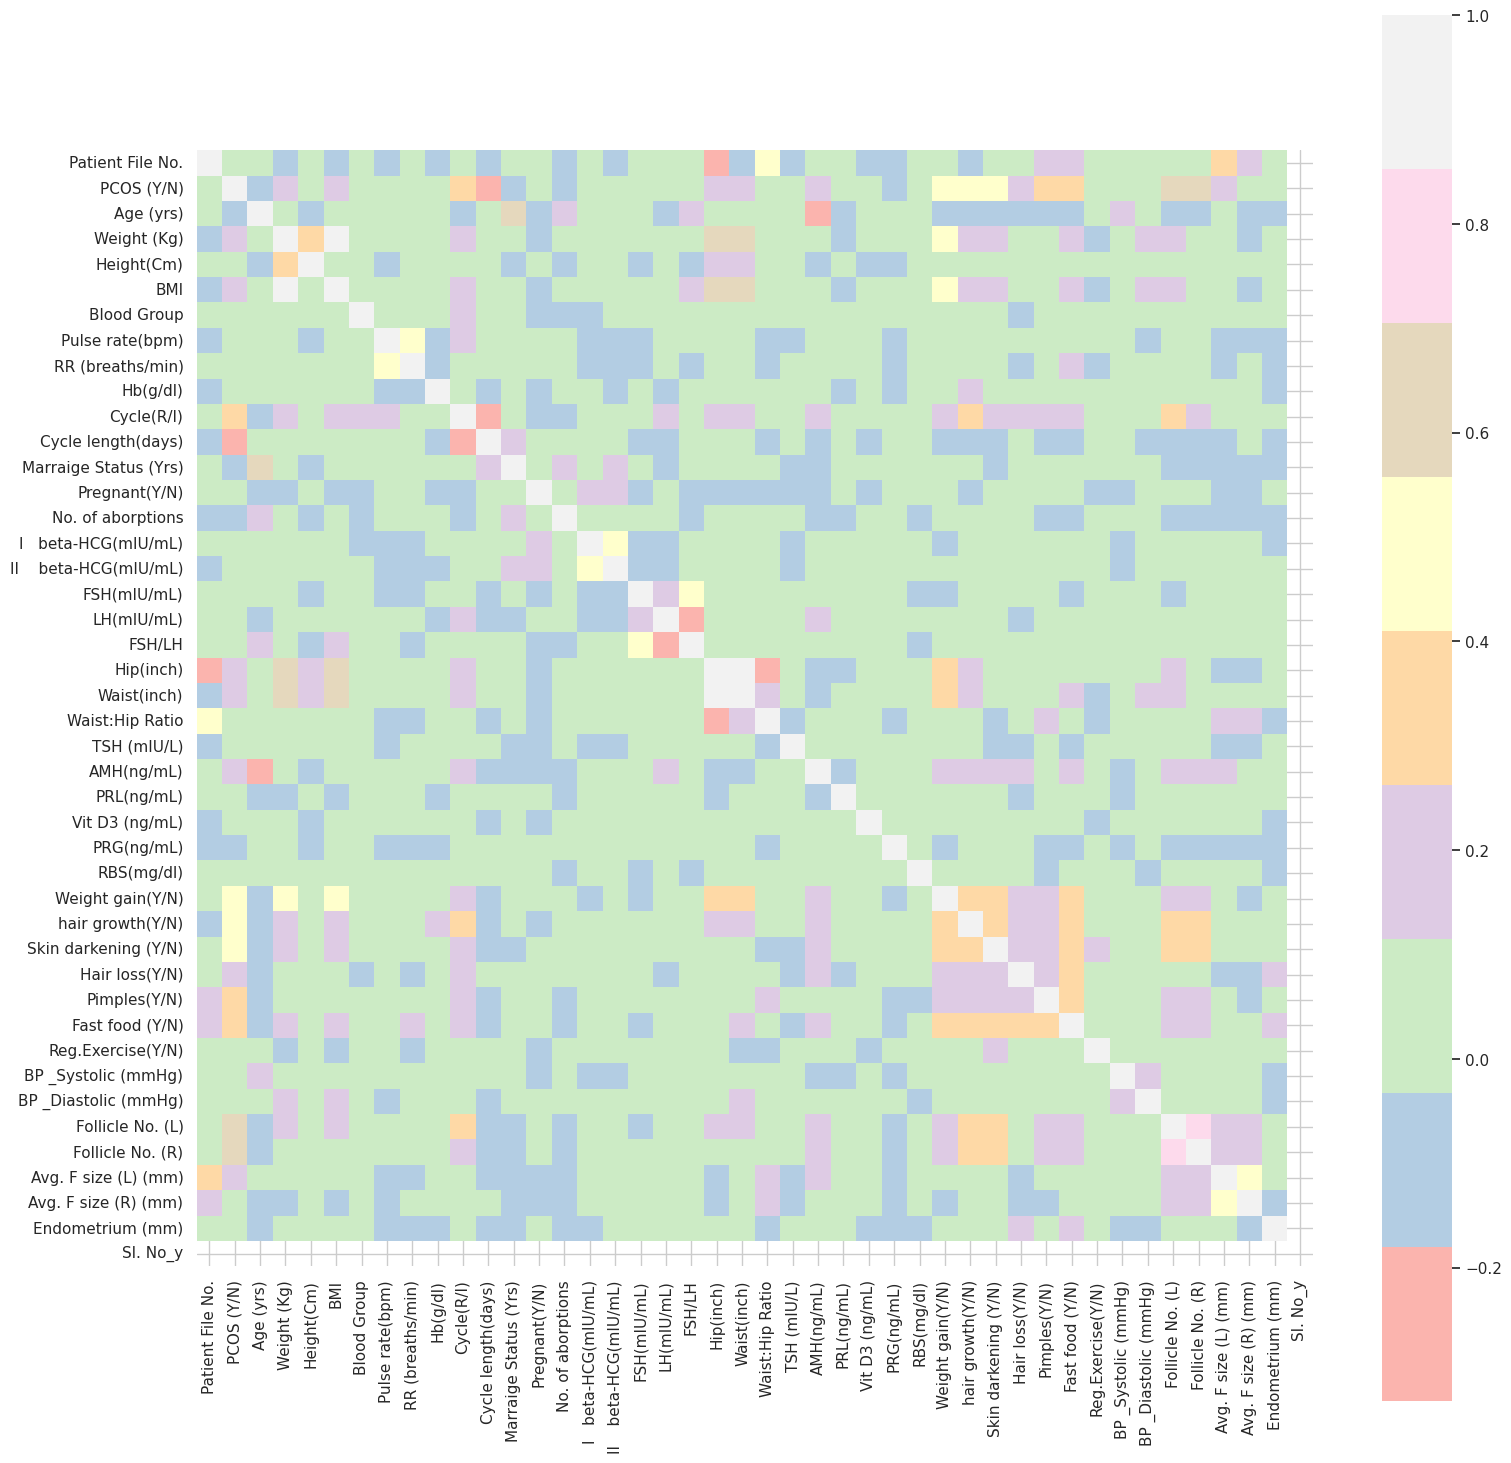

In [44]:
#Examaning a correlation matrix of all the features

corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True);


In [45]:
#How all the features correlate with the PCOS

corrmat["PCOS (Y/N)"].sort_values(ascending=False)

,PCOS (Y/N)
PCOS (Y/N),1.000000
Follicle No. (R),0.650915
Follicle No. (L),0.605305
Skin darkening (Y/N),0.474561
hair growth(Y/N),0.463557
Weight gain(Y/N),0.445646
Cycle(R/I),0.404082
Fast food (Y/N),0.376877
Pimples(Y/N),0.295313
AMH(ng/mL),0.261105


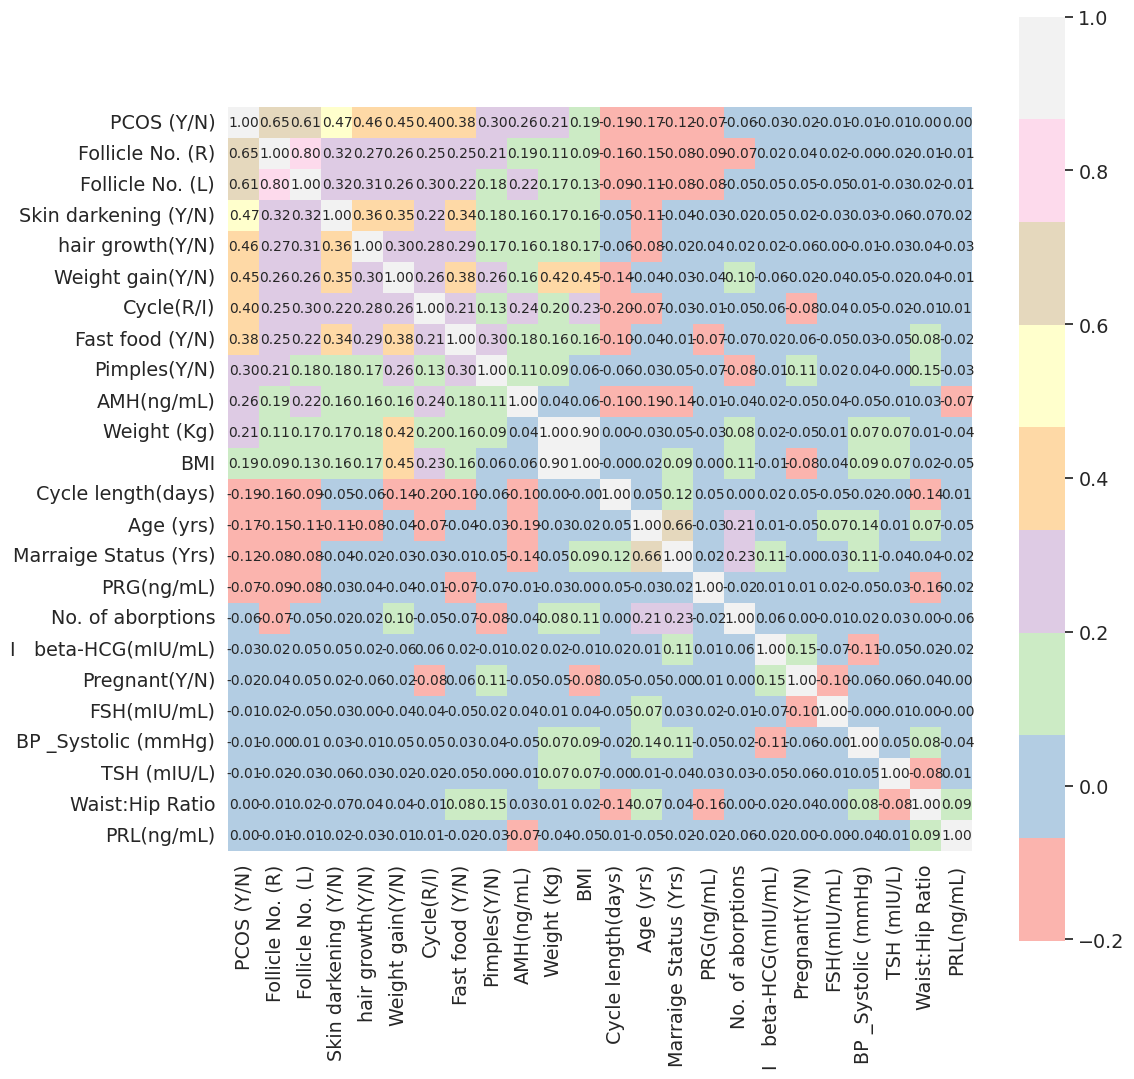

In [46]:
#Having a look at features bearing significant correlation
plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmapk=12
cols_p= corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols_n = corrmat.nsmallest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n)

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

PATTERN OF LENGTH OF MENSTRUAL CYCLE

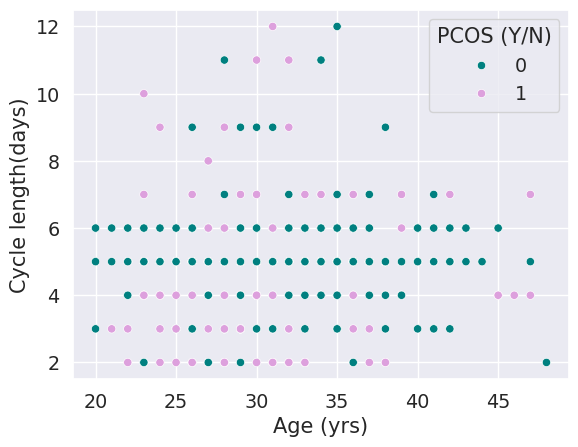

In [47]:

color = ["teal", "plum"]

# Create the scatter plot
fig = sns.scatterplot(data=data, x="Age (yrs)", y="Cycle length(days)", hue="PCOS (Y/N)", palette=color)

# Show the plot
plt.show()

The length of the menstrual phase is overall consistent over different ages for normal cases. Whereas in the case of PCOD the length increased with age.

PATTERN OF BMI

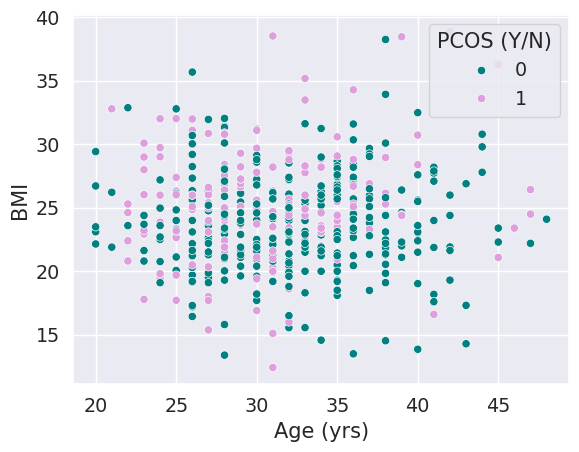

In [48]:
fig = sns.scatterplot(data=data, x="Age (yrs)", y="BMI", hue="PCOS (Y/N)", palette=color)

# Show the plot
plt.show()

Body mass index (BMI) is showing consistency for normal cases. Whereas for PCOS the BMI increases with age.

PATTERNS OF IRREGULARITY IN MENSURATION

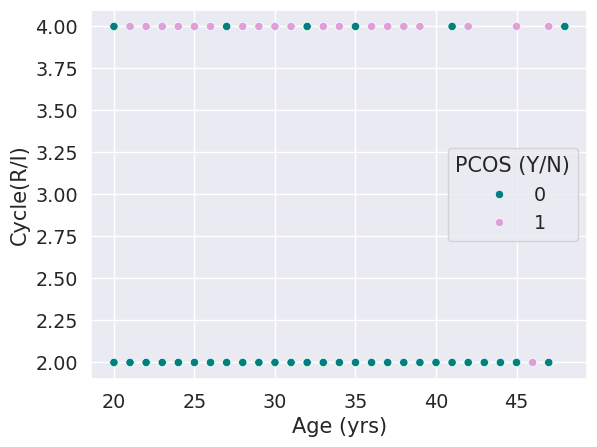

In [49]:
sns.scatterplot(data=data, x="Age (yrs)", y="Cycle(R/I)", hue="PCOS (Y/N)", palette=color)

# Show the plot
plt.show()

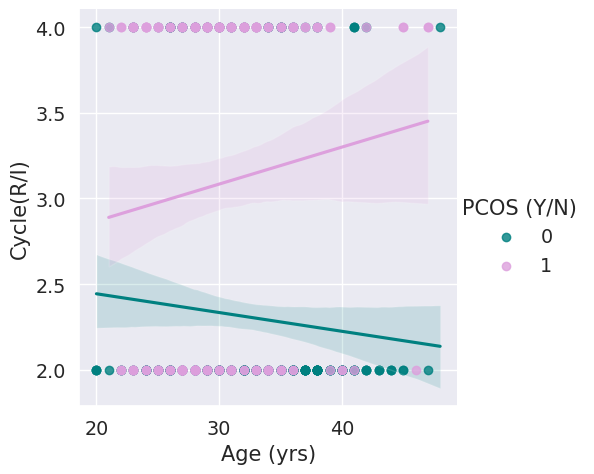

In [50]:
# cycle IR wrt age
sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette=color)
plt.show()


The mensural cycle becomes more regular for normal cases with age. Whereas, for PCOS the irregularity increases with age.

NUMBER OF FOLLICLES

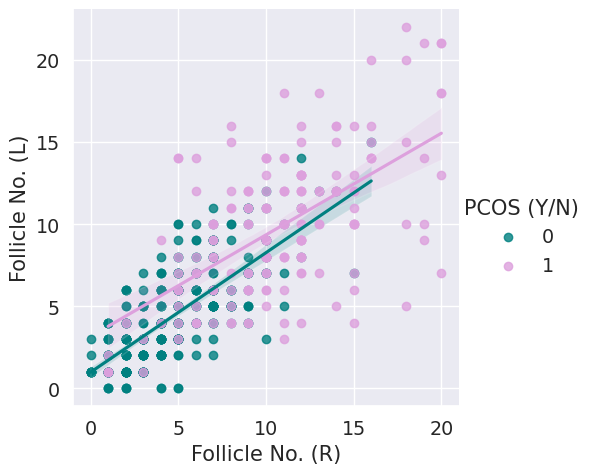

In [51]:
 # Distribution of follicles in both ovaries.
sns.lmplot(data=data, x='Follicle No. (R)', y='Follicle No. (L)', hue="PCOS (Y/N)", palette=color)

# Show the plot
plt.show()

The distribution of follicles in both ovaries Left and Right are not equal for women with PCOS in comparison with the "Normal" patient. Thia is curious let's exlore it with boxen plot.

<ipython-input-52-7abf845109c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


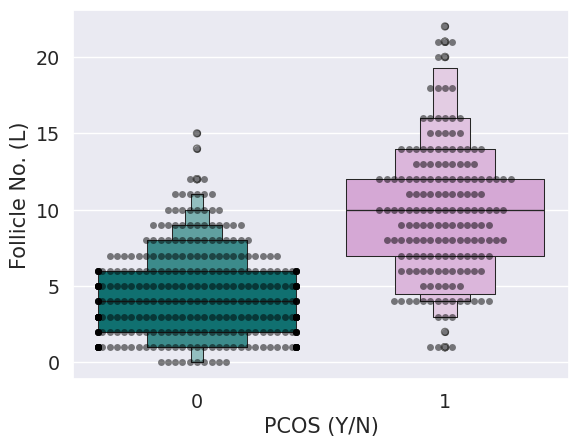

<ipython-input-52-7abf845109c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


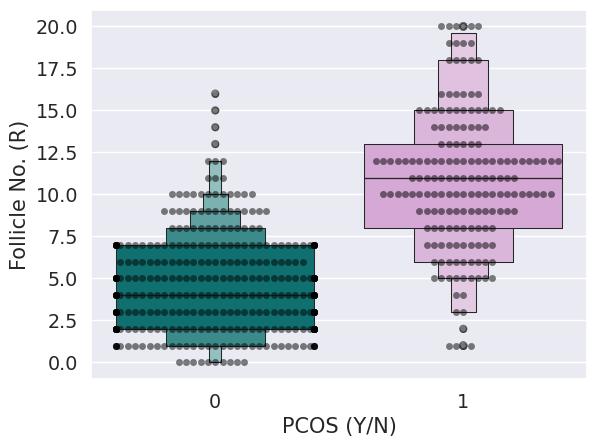

In [52]:
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
    plt.show()


The number of follicles in women with PCOS is higher, as expected. And are unequal as well.

<ipython-input-53-484e90987139>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)


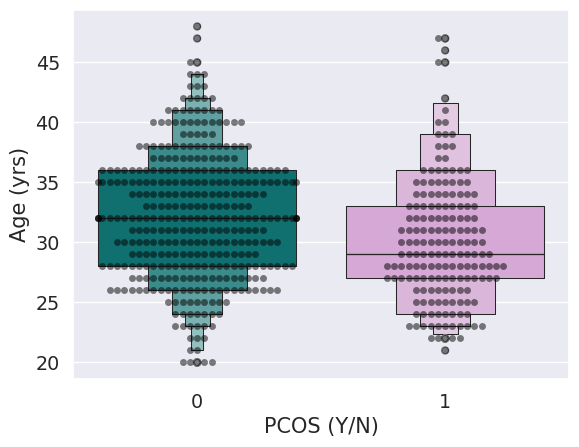

<ipython-input-53-484e90987139>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


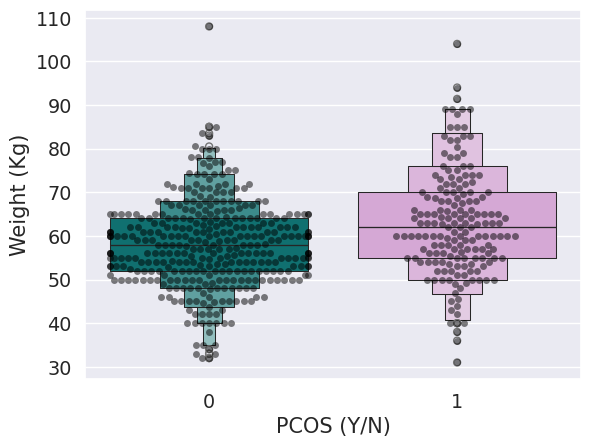

<ipython-input-53-484e90987139>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)


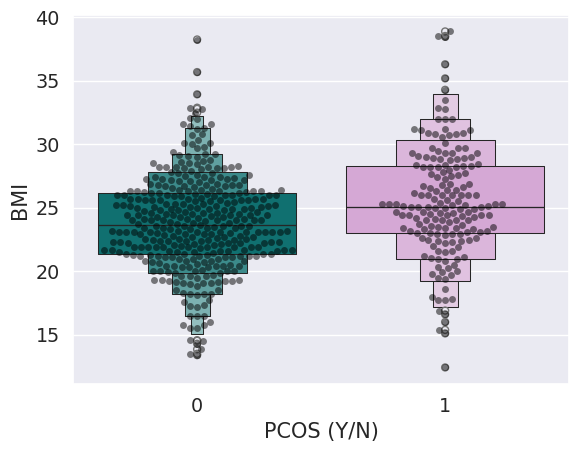

<ipython-input-53-484e90987139>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


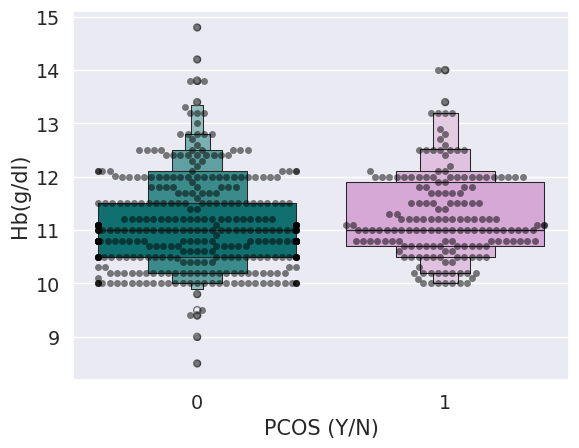

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-53-484e90987139>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categori

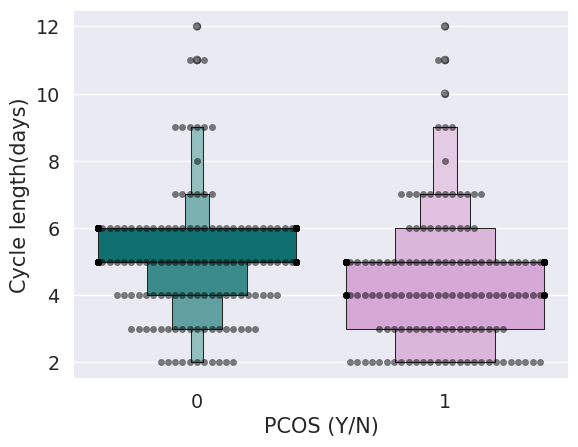

<ipython-input-53-484e90987139>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


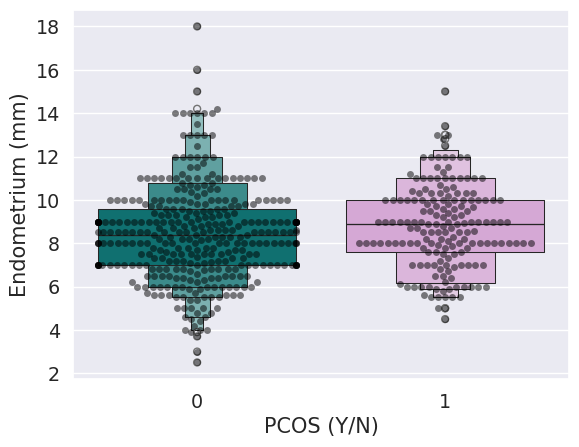

In [53]:
features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
    plt.show()

MODEL BUILDING

In [57]:
# Assinging the features as X and target as Y
X=data.drop(["PCOS (Y/N)","Patient File No."],axis=1)
y=data["PCOS (Y/N)"]

# splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

COMPARING THE ACCURACY OF DIFFERENT CLASSIFIERS

In [55]:
!pip install --upgrade xgboost

LR: 0.876306 (0.057721)


<ipython-input-58-be9007213b82>:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results,labels=names)


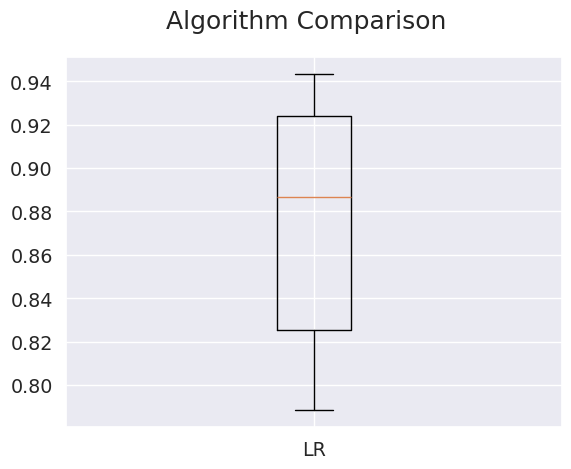

KNN: 0.866836 (0.045190)


<ipython-input-58-be9007213b82>:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results,labels=names)


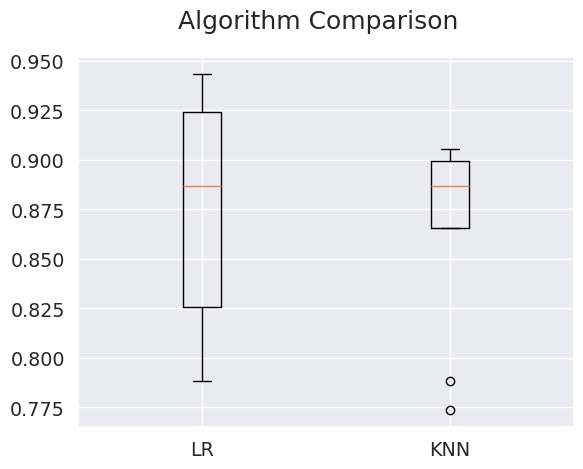

DT: 0.834543 (0.052559)


<ipython-input-58-be9007213b82>:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results,labels=names)


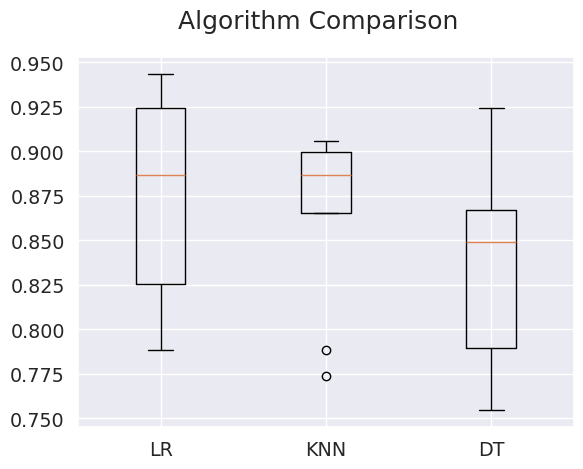

NB: 0.855443 (0.034329)


<ipython-input-58-be9007213b82>:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results,labels=names)


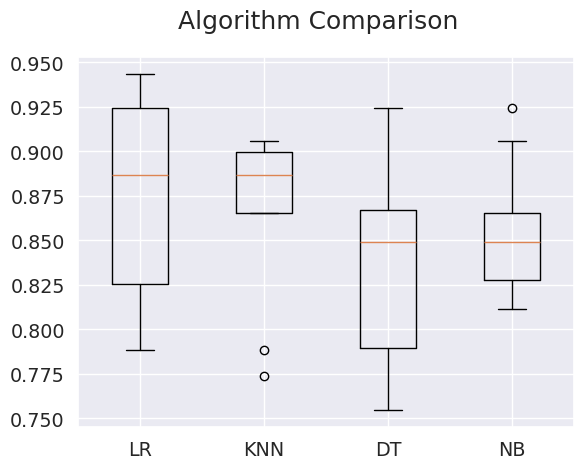

SVM: 0.883890 (0.052436)


<ipython-input-58-be9007213b82>:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results,labels=names)


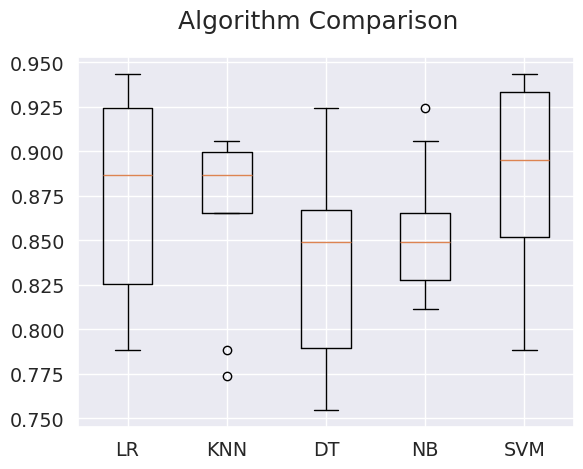

RF: 0.895210 (0.043506)


<ipython-input-58-be9007213b82>:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results,labels=names)


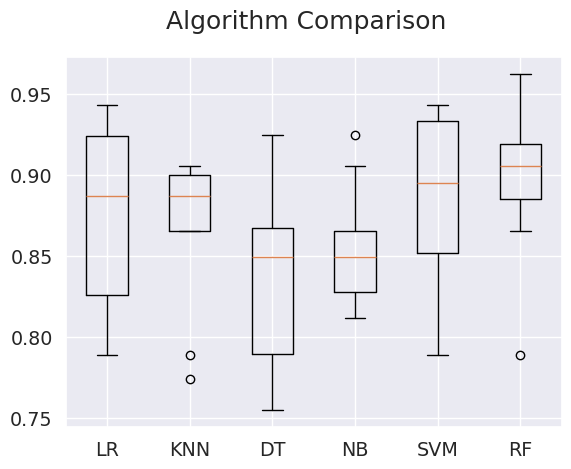

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:03:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:03:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:03:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:03:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:03:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGB: 0.893360 (0.033902)


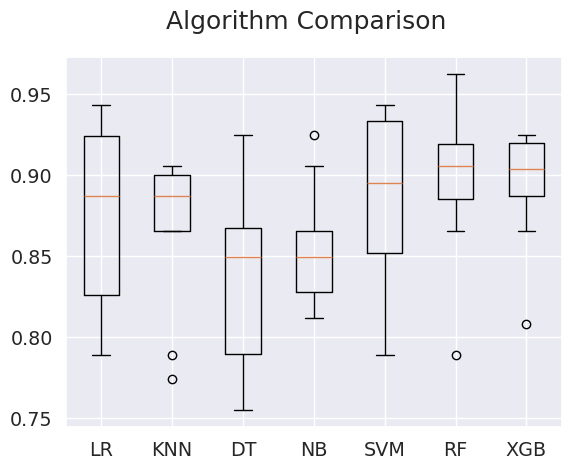

In [58]:
# Data preprocessing
# model selection using cross validation
from sklearn.preprocessing import StandardScaler

X = data.drop(["PCOS (Y/N)", "Sl. No_y", "Patient File No."], axis=1)
y = data["PCOS (Y/N)"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define models
models = [
    ('LR', LogisticRegression(max_iter=500)),  # Increase iterations
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC()),
    ('RF', RandomForestClassifier()),
    ('XGB', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Cross-validation
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_scaled, y, cv=kfold, scoring=scoring)  # Use X_scaled
    results.append(cv_results)
    names.append(name)
    # print(f"{name}: {cv_results.mean():.5f} ({cv_results.std():.5f})")
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results,labels=names)
    ax.set_xticklabels(names)
    plt.show()


In [59]:
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaN values with the column mean
imputer = SimpleImputer(strategy='mean')  # You can use 'median' if your data has outliers

# Apply imputation
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [60]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Apply StandardScaler to scale the data
scaler = StandardScaler()

# Scale both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Comparing accuracies of different classifiers to find the best suited models for PCOS predictor
model_list = ["Decision Tree", "Random Forest", "Logistic Regression", "KNN", "Naive Bayes", "SVM", "XGBoost"]
random_state = 42

# Define the models
classifier = [
    DecisionTreeClassifier(random_state=random_state),
    RandomForestClassifier(random_state=random_state),
    LogisticRegression(max_iter=10000, random_state=random_state, solver='lbfgs'),  # Increased max_iter
    KNeighborsClassifier(3),
    GaussianNB(),
    SVC(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_state)  # Added XGBoost
]

scores = []

# Evaluate each model
for name, clf in zip(model_list, classifier):
    print(f"Training {name}...")
    try:
        clf.fit(X_train_scaled, y_train)  # Use the scaled data
        y_pred = clf.predict(X_test_scaled)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)
        print(f"{name}: Accuracy = {score:.4f}")
    except Exception as e:
        print(f"Error with {name}: {e}")

# Print all scores
print("\nFinal Model Accuracies:")
for model, score in zip(model_list, scores):
    print(f"{model}: {score:.4f}")


Training Decision Tree...
Decision Tree: Accuracy = 0.8491
Training Random Forest...
Random Forest: Accuracy = 0.9245
Training Logistic Regression...
Logistic Regression: Accuracy = 0.9340
Training KNN...
KNN: Accuracy = 0.8774
Training Naive Bayes...
Naive Bayes: Accuracy = 0.8585
Training SVM...
SVM: Accuracy = 0.9151
Training XGBoost...
XGBoost: Accuracy = 0.9245

Final Model Accuracies:
Decision Tree: 0.8491
Random Forest: 0.9245
Logistic Regression: 0.9340
KNN: 0.8774
Naive Bayes: 0.8585
SVM: 0.9151
XGBoost: 0.9245


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:03:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [61]:
scores

[0.8490566037735849,
 0.9245283018867925,
 0.9339622641509434,
 0.8773584905660378,
 0.8584905660377359,
 0.9150943396226415,
 0.9245283018867925]

In [62]:
df=pd.DataFrame()
df['models']=model_list
df['score']=scores
df

,models,score
0,Decision Tree,0.849057
1,Random Forest,0.924528
2,Logistic Regression,0.933962
3,KNN,0.877358
4,Naive Bayes,0.858491
5,SVM,0.915094
6,XGBoost,0.924528


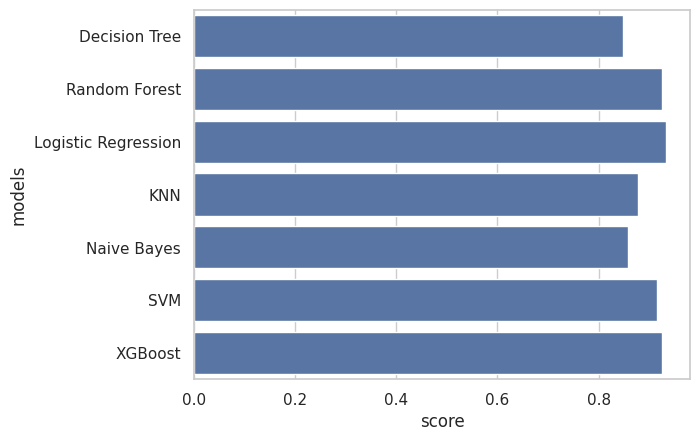

In [63]:
sns.set(style="whitegrid")
ax=sns.barplot(y="models",x="score",data=df)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# List of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Iterate over each model
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Score on test data
    print(f"Score in Test Data: {model.score(X_test, y_test):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    p_right = cm[0][0] + cm[1][1]
    p_wrong = cm[0][1] + cm[1][0]

    print(f"Correct Predictions: {p_right}")
    print(f"Wrong Predictions: {p_wrong}")

    # Display confusion matrix
    print("Confusion Matrix:")
    print(cm)



Training Logistic Regression...
Accuracy: 0.9151
Score in Test Data: 0.9151
Correct Predictions: 97
Wrong Predictions: 9
Confusion Matrix:
[[73  5]
 [ 4 24]]

Training Decision Tree...
Accuracy: 0.8679
Score in Test Data: 0.8679
Correct Predictions: 92
Wrong Predictions: 14
Confusion Matrix:
[[69  9]
 [ 5 23]]

Training Random Forest...
Accuracy: 0.9151
Score in Test Data: 0.9151
Correct Predictions: 97
Wrong Predictions: 9
Confusion Matrix:
[[75  3]
 [ 6 22]]

Training KNN...
Accuracy: 0.6321
Score in Test Data: 0.6321
Correct Predictions: 67
Wrong Predictions: 39
Confusion Matrix:
[[56 22]
 [17 11]]

Training Naive Bayes...
Accuracy: 0.8585
Score in Test Data: 0.8585
Correct Predictions: 91
Wrong Predictions: 15
Confusion Matrix:
[[76  2]
 [13 15]]

Training SVM...
Accuracy: 0.7358
Score in Test Data: 0.7358
Correct Predictions: 78
Wrong Predictions: 28
Confusion Matrix:
[[78  0]
 [28  0]]

Training XGBoost...
Accuracy: 0.9245
Score in Test Data: 0.9245
Correct Predictions: 98
Wrong

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:04:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [65]:
rfc = RandomForestClassifier()
r = rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(f"Accuracy: {accuracy}")

# Print the predictions
print(pred_rfc)

# Save the trained RandomForest model using joblib
joblib.dump(rfc, 'rfc.joblib')  # Save the model

Accuracy: 0.9245283018867925
[0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]


['rfc.joblib']

In [66]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Use 'median' if needed
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [68]:
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))  # If imbalance exists, use SMOTE


{0: 275, 1: 145}


In [74]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define base models (including RandomForestClassifier)
base_models = [
    ('nb', GaussianNB()),
    ('svm', SVC(kernel='rbf', probability=True, C=10, gamma='scale', random_state=42)),
    ('xgb', XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=7)),
    ('logreg', LogisticRegression(C=1.0, max_iter=5000, solver='lbfgs', random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42))  # Added RandomForest
]

# Use a classifier for the meta model (not LinearRegression)
meta_model = LogisticRegression(max_iter=5000, solver='lbfgs', random_state=42)  # Logistic Regression as final classifier

# Create the Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the Stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred = stacking_model.predict(X_test)

# Evaluate accuracy
print(f"Improved Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Improved Model Accuracy: 0.9340


In [72]:
import pickle

In [73]:
from google.colab import files

files.download("pcos.pkl")  # For pickle file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>